In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

to analyse:
- the length of the message
- number of words
- most common word for spam and ham

In [2]:
df = pd.read_csv('email.csv')
df = df.drop([len(df) -1])
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# basic EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df[df['Message'].duplicated()]

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [5]:
# df = df.drop_duplicates(subset= 'Message')
# len(df)

Category
ham     4825
spam     747
Name: count, dtype: int64


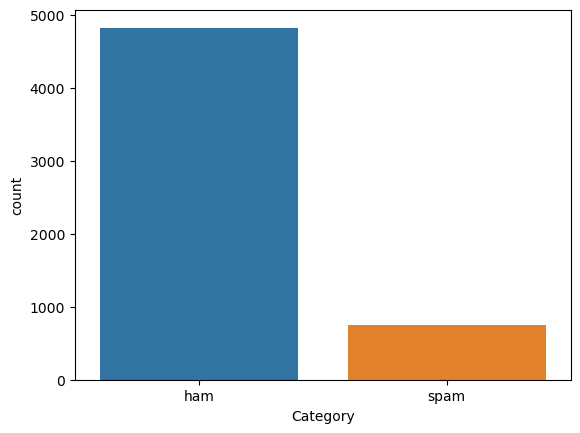

In [6]:
print(df['Category'].value_counts())
sns.countplot(df, x = 'Category')
plt.show()

In [7]:
df[df['Category'] == 'spam']

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [8]:
df['length'] = df['Message'].apply(len)
df['num_word'] = df['Message'].apply(word_tokenize).apply(len)
df['num_sent'] = df['Message'].apply(sent_tokenize).apply(len)

In [9]:
print(f'mean length of spam message: {df[df["Category"] == "spam"]["length"].mean()}')
print(f'mean length of not spam message: {df[df["Category"] != "spam"]["length"].mean()}')
print(f'mean number of words of spam message: {df[df["Category"] == "spam"]["num_word"].mean()}')
print(f'mean number of words of not spam message: {df[df["Category"] != "spam"]["num_word"].mean()}')
print(f'mean number of sentence of spam message: {df[df["Category"] == "spam"]["num_sent"].mean()}')
print(f'mean number of sentence of not spam message: {df[df["Category"] != "spam"]["num_sent"].mean()}')

mean length of spam message: 137.9892904953146
mean length of not spam message: 71.44829015544042
mean number of words of spam message: 27.87817938420348
mean number of words of not spam message: 17.425699481865284
mean number of sentence of spam message: 3.0294511378848727
mean number of sentence of not spam message: 1.8460103626943005


<Axes: xlabel='num_sent', ylabel='Category'>

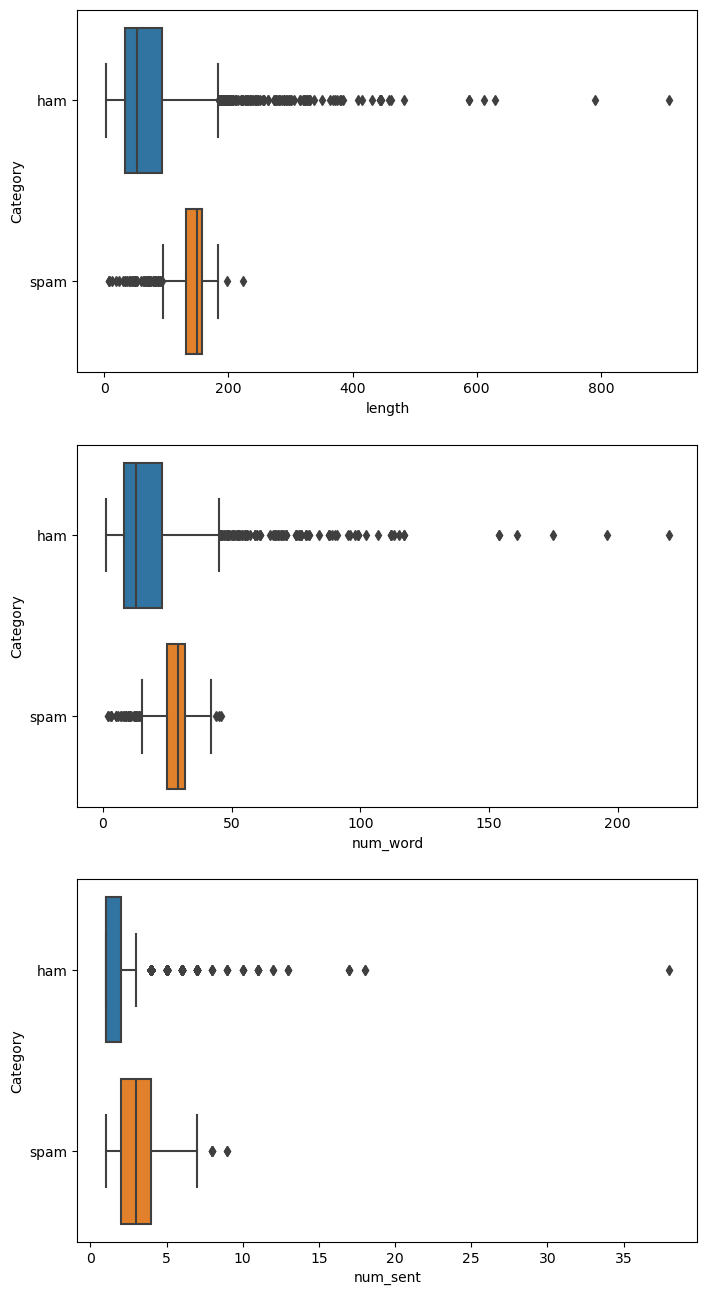

In [12]:
fig, ax = plt.subplots(3,1, figsize = (8,16))
sns.boxplot(df, x= 'length', y = 'Category', ax = ax[0])
sns.boxplot(df, x= 'num_word', y = 'Category', ax = ax[1])
sns.boxplot(df, x= 'num_sent', y = 'Category', ax = ax[2])

In [30]:
print(df[df['num_sent'] == df['num_sent'].max()]['Message'].values[0])

How to Make a girl Happy? It's not at all difficult to make girls happy. U only need to be... 1. A friend 2. Companion 3. Lover 4. Chef . . .  &lt;#&gt; . Good listener  &lt;#&gt; . Organizer  &lt;#&gt; . Good boyfriend  &lt;#&gt; . Very clean  &lt;#&gt; . Sympathetic  &lt;#&gt; . Athletic  &lt;#&gt; . Warm . . .  &lt;#&gt; . Courageous  &lt;#&gt; . Determined  &lt;#&gt; . True  &lt;#&gt; . Dependable  &lt;#&gt; . Intelligent . . .  &lt;#&gt; . Psychologist  &lt;#&gt; . Pest exterminator  &lt;#&gt; . Psychiatrist  &lt;#&gt; . Healer . .  &lt;#&gt; . Stylist  &lt;#&gt; . Driver . . Aaniye pudunga venaam..
